In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv(r'C:\Users\DELL\Desktop\machine learing_ine\sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

FileNotFoundError: ignored

In [10]:
from google.colab import files

In [11]:
uploaded=files.upload()

Saving sales-of-shampoo-over-a-three-ye.csv to sales-of-shampoo-over-a-three-ye.csv


In [14]:
import io

In [17]:
series = pd.read_csv(io.BytesIO(uploaded['sales-of-shampoo-over-a-three-ye.csv']), header=0,parse_dates=True,index_col='Month')



In [18]:
series.head()


,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [19]:
series = series.dropna()


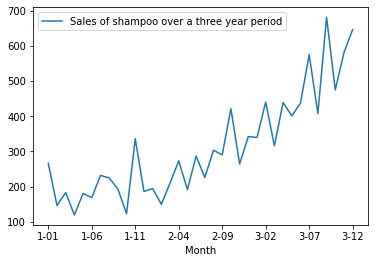

In [20]:
series.plot()
plt.show()


From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.



In [22]:
X = series.values


In [23]:
size = int(len(X) * 0.60)
print(len(X))
print(size)


36
21


In [24]:
train, test = X[0:size], X[size:len(X)]


In [25]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")


Predicted=[272.96448367],Expected =[421.6]
Predicted=[290.31373201],Expected =[264.5]
Predicted=[349.11777313],Expected =[342.3]
Predicted=[306.51290693],Expected =[339.7]
Predicted=[387.37642791],Expected =[440.4]
Predicted=[348.15419518],Expected =[315.9]
Predicted=[386.30883484],Expected =[439.3]
Predicted=[356.08203963],Expected =[401.3]
Predicted=[446.37949786],Expected =[437.4]
Predicted=[394.73729062],Expected =[575.5]
Predicted=[434.91553285],Expected =[407.6]
Predicted=[507.92336452],Expected =[682.]
Predicted=[435.48287297],Expected =[475.3]
Predicted=[652.74394289],Expected =[581.3]
Predicted=[546.34356782],Expected =[646.9]
TEST MSE :7547.8085969888925


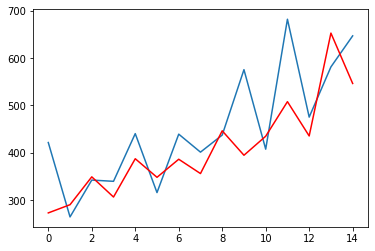

In [26]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
